# Task 3: CUSTOMER CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Documents\CODSOFT\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().any()

False

In [6]:
unwanted_cols=['RowNumber', 'Surname', 'Tenure']
df.drop(columns=unwanted_cols, inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,125510.82,1,1,1,79084.10,0


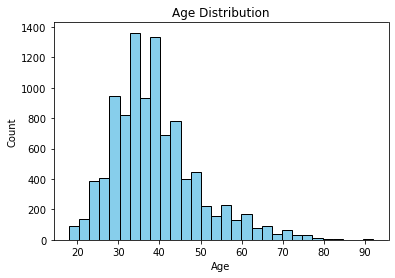

In [7]:
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

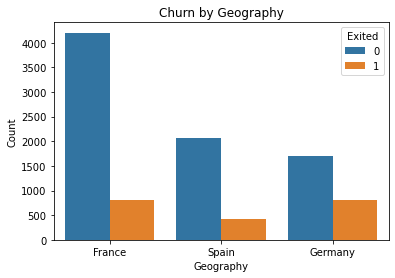

In [9]:
import seaborn as sns
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Churn by Geography')
plt.show()


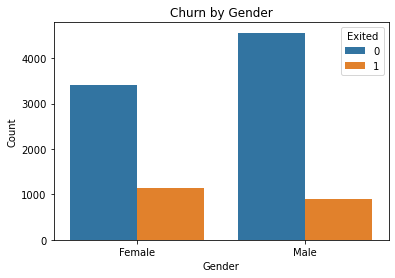

In [10]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')
plt.show()


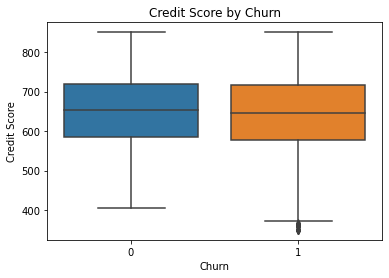

In [11]:
#to check whether there is a significant difference in credit scores between customers who churned and those who didn't.
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.title('Credit Score by Churn')
plt.show()


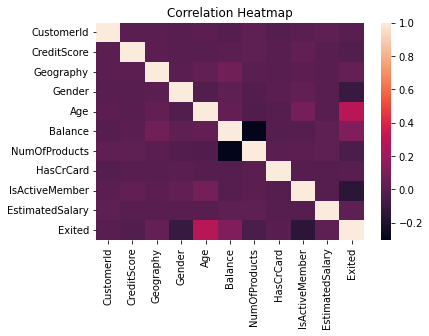

In [41]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()


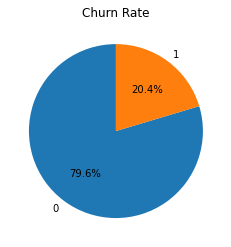

In [13]:
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#Changing categorical variables to numeric
label_encoder=LabelEncoder()

categorical_col=['Geography', 'Gender']
for column in categorical_col:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,125510.82,1,1,1,79084.10,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [21]:
X=df.iloc[:, 0:-1]
y=df['Exited']

In [22]:
#Splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and training

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_classifier = RandomForestClassifier(random_state=42)

In [26]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
rf_predictions = rf_classifier.predict(X_test)

In [30]:
# Evaluate models
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.869
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

